In [97]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('colorblind')

## Questions
- did investigations decrease or happen more slowly during covid 2020 compared with 2018 and 2019?  
- Were there more incidents reported under any of the statutory headers?
- Were there more / fewer cases deemed founded, and/or directives issued, during covid? 
- How many reports come from staff and how many from residents? Patterns there? (I had trouble discerning whether they are even giving me this, or if they are only showing me who they deemed their primary witness)
- How many times did resident-sourced complaints succeed versus staff-sourced?
- Are there other notable things to be drawn in terms of trends?

In [99]:
abuse_data = pd.read_csv('cleaned_data/foipop_march_2021_ppc_stats.csv')
abuse_data['Year-Month'] = pd.to_datetime(abuse_data['Year-Month'])
abuse_data['Year'] = abuse_data['Year-Month'].dt.year

year_sums = abuse_data.groupby('Year').sum()
year_sums['% of Referrals Investigated'] = year_sums['Investigated'] / year_sums['Referral'] * 100
year_sums['% of Investigations Founded'] = year_sums['Founded'] / year_sums['Investigated'] * 100
year_sums['% of Founded Referrals Leading to Directives'] = year_sums['Directives'] / year_sums['Founded'] * 100
year_sums['% of Referrals "Staff to Resident"'] = year_sums['Staff'] / year_sums['Referral'] * 100

year_sums = year_sums.reset_index()

year_means = abuse_data.groupby('Year').mean()
year_means = year_means.reset_index()

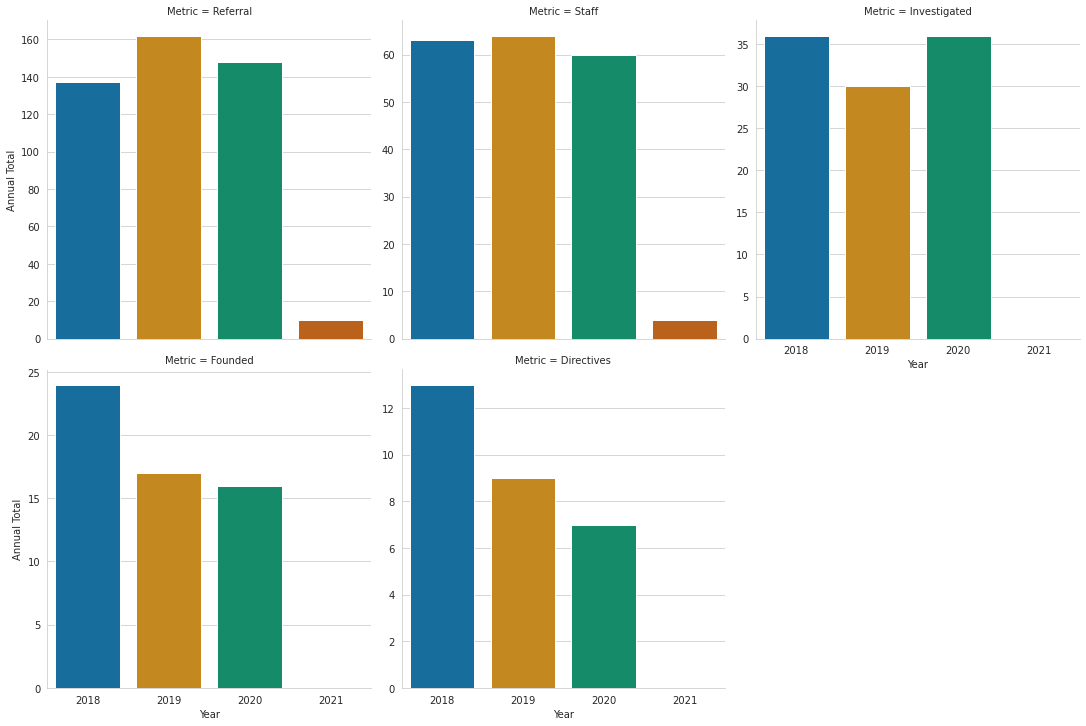

In [100]:
overall_counts = year_sums[['Year', 'Referral', 'Staff', 'Investigated', 'Founded', 'Directives']]
overall_counts = pd.melt(overall_counts, id_vars='Year', var_name='Metric', value_name='Annual Total')
sns.catplot(data = overall_counts, kind='bar', x='Year', y='Annual Total', col='Metric', col_wrap=3, sharey=False)
plt.savefig('plots/annual_totals_for_incidents.png', dpi=300, bbox_inches='tight')

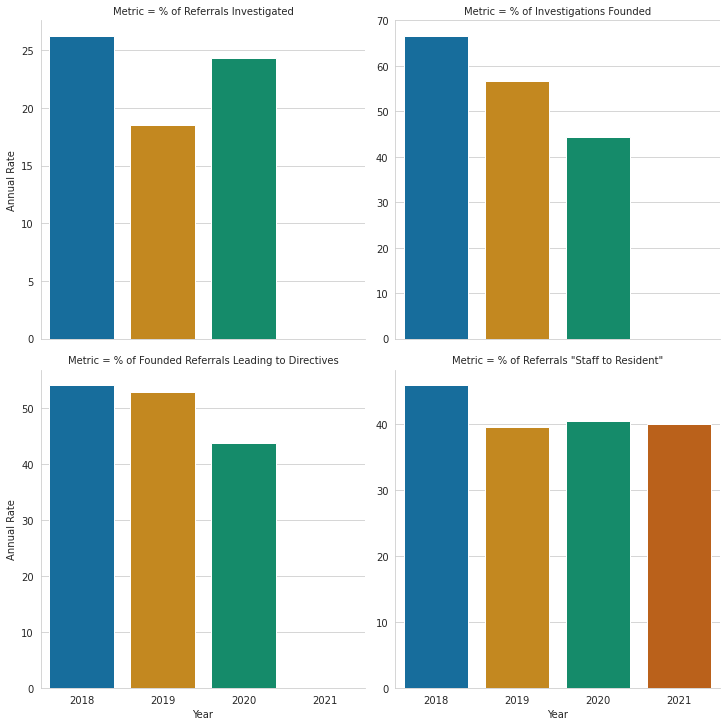

In [101]:
overall_rates = year_sums[['Year', '% of Referrals Investigated', '% of Investigations Founded', '% of Founded Referrals Leading to Directives', '% of Referrals "Staff to Resident"']]
overall_rates = pd.melt(overall_rates, id_vars='Year', var_name='Metric', value_name='Annual Rate')
sns.catplot(data = overall_rates, kind='bar', x='Year', y='Annual Rate', col='Metric', col_wrap=2, sharey=False)
plt.savefig('plots/annual_investigation_rates.png', dpi=300, bbox_inches='tight')

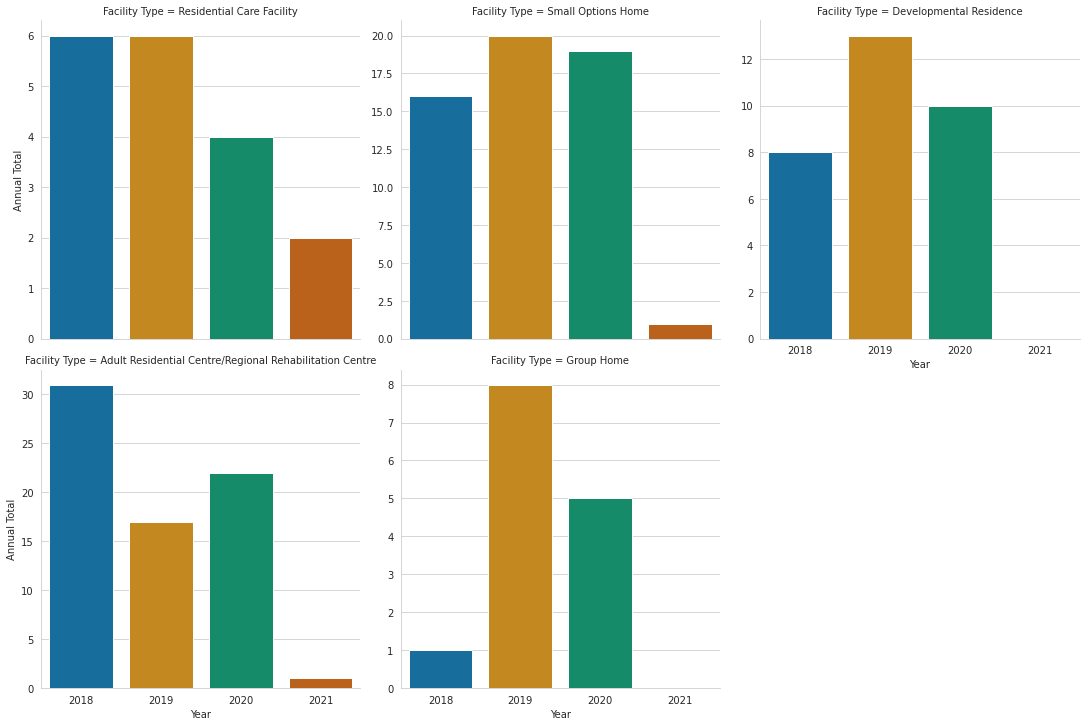

In [102]:
overall_facilities = year_sums[['Year'] + [x for x in year_sums.columns if x.startswith('Facility Type:')]]
overall_facilities.columns = [x.replace('Facility Type: ', '') for x in overall_facilities]
overall_facilities = pd.melt(overall_facilities, id_vars = 'Year', var_name='Facility Type', value_name='Annual Total')
sns.catplot(data = overall_facilities, kind='bar', x='Year', y='Annual Total', col='Facility Type', col_wrap=3, sharey=False)
plt.savefig('plots/annual_totals_for_facility_types.png', dpi=300, bbox_inches='tight')

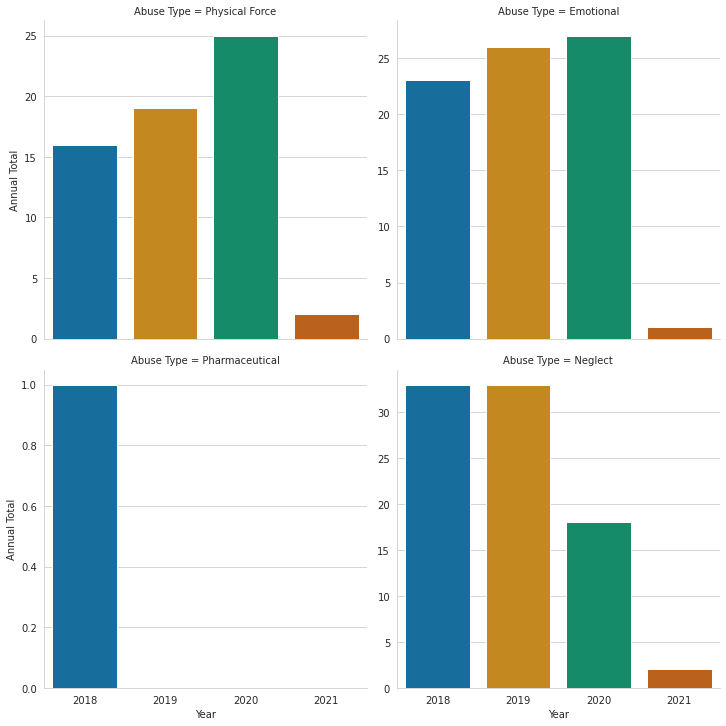

In [103]:
overall_abuse = year_sums[['Year'] + [x for x in year_sums.columns if x.startswith('Type of Abuse:')]]
overall_abuse.columns = [x.replace('Type of Abuse: ', '') for x in overall_abuse]
overall_abuse = pd.melt(overall_abuse, id_vars = 'Year', var_name='Abuse Type', value_name='Annual Total')
sns.catplot(data = overall_abuse, kind='bar', x='Year', y='Annual Total', col='Abuse Type', col_wrap=2, sharey=False)
plt.savefig('plots/annual_totals_for_abuse_types.png', dpi=300, bbox_inches='tight')

In [104]:
overall_abuse

,Year,Abuse Type,Annual Total
0,2018,Physical Force,16.0
1,2019,Physical Force,19.0
2,2020,Physical Force,25.0
3,2021,Physical Force,2.0
4,2018,Emotional,23.0
5,2019,Emotional,26.0
6,2020,Emotional,27.0
7,2021,Emotional,1.0
8,2018,Pharmaceutical,1.0
9,2019,Pharmaceutical,0.0


In [105]:
year_sums.columns

Index(['Year', 'Referral', 'Staff', 'Facility Type: Residential Care Facility',
       'Facility Type: Small Options Home',
       'Facility Type: Developmental Residence',
       'Facility Type: Adult Residential Centre/Regional Rehabilitation Centre',
       'Facility Type: Group Home', 'Type of Abuse: Physical Force',
       'Type of Abuse: Emotional', 'Type of Abuse: Pharmaceutical',
       'Type of Abuse: Neglect', 'Investigated', 'Founded', 'Directives',
       '% of Referrals Investigated', '% of Investigations Founded',
       '% of Founded Referrals Leading to Directives',
       '% of Referrals "Staff to Resident"'],
      dtype='object')

In [106]:
year_sums_melt = pd.melt(year_sums, id_vars='Year', var_name='Variable', value_name='Annual Total')

/home/fin/miniconda3/envs/eda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


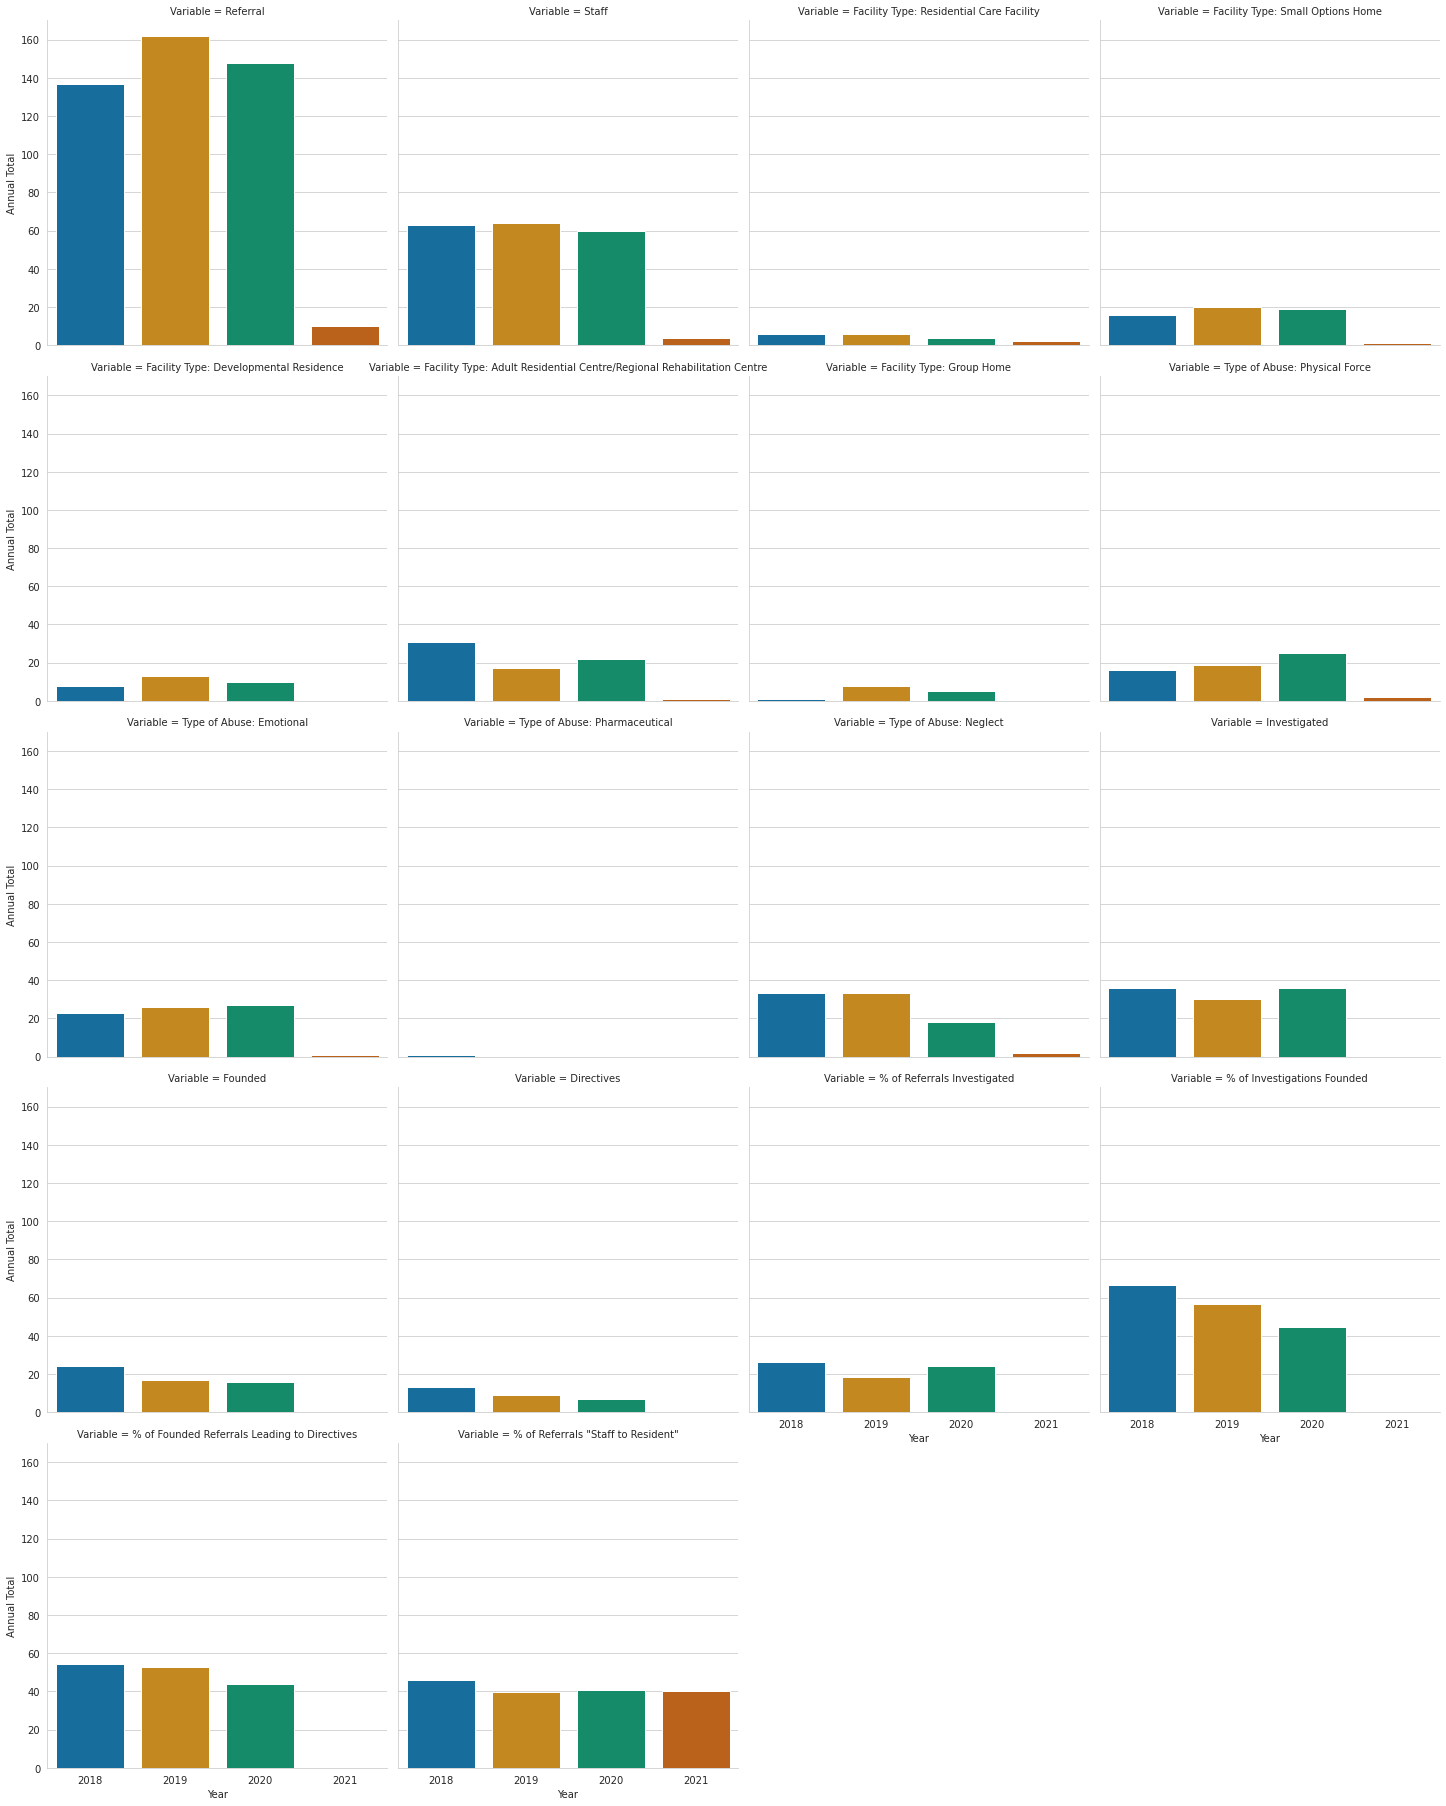

In [107]:
sns.factorplot(data = year_sums_melt, kind='bar', x='Year', y='Annual Total', col='Variable', col_wrap=4)

In [51]:
year_sums_melt

,Year,Variable,Annual Total
0,2018,Referral,137.000000
1,2019,Referral,162.000000
2,2020,Referral,148.000000
3,2021,Referral,10.000000
4,2018,Staff,63.000000
...,...,...,...
59,2021,% of Referrals Investigated,0.000000
60,2018,% of Investigations Founded,66.666667
61,2019,% of Investigations Founded,56.666667
62,2020,% of Investigations Founded,44.444444
